In [2]:
import pandas as pd
import psycopg2
from psycopg2 import OperationalError
import matplotlib.pyplot as plt
import numpy as np


In [7]:
#df = pd.read_csv('data/electricite/donnees_elec_adresse_2018.csv', sep = ';', encoding='utf8')
df = pd.read_csv('data/electricite/donnees_elec_2008.csv', sep = ';', encoding='latin-1')
df

,OPERATEUR,ANNEE,FILIERE,TYPE,CODE,CONSOA,PDLA,INDQUALA,CONSOI,PDLI,INDQUALI,CONSOT,PDLT,INDQUALT,CONSOR,PDLR,INDQUALR,CONSONA,PDLNA,INDQUALNA
0,Régie délectricité de Roquebillière,2008,E,Commune,6103,"0,00",0,"0,000000","1270,00",7,"1,000000","1601,00",97,"1,000000","5954,00",1154,"1,000000","963,00",53,"1,000000"
1,Régie municipale délectricité dArignac,2008,E,Commune,9015,"0,00",0,"0,000000","164,00",1,"1,000000","358,00",30,"0,500000","1703,00",410,"0,500000","267,00",16,"0,500000"
2,Régie municipale délectricité de Dalou,2008,E,Commune,9104,"0,00",0,"0,000000","0,00",0,"0,000000","54,00",8,"1,000000","1704,00",352,"1,000000","287,00",15,"1,000000"
3,Régie municipale délectricité de lHospitalet...,2008,E,Commune,9139,"0,00",0,"0,000000","0,00",0,"0,000000","490,00",27,"1,000000","344,00",98,"1,000000","272,00",19,"1,000000"
4,Régie municipale délectricité de Mazères,2008,E,Commune,9185,"374,00",95,"1,000000","8010,00",14,"1,000000","2760,00",101,"1,000000","9000,00",1741,"1,000000","560,00",83,"1,000000"
5,Régie municipale délectricité de Mercus et Ga...,2008,E,Commune,9188,"0,00",0,"0,000000","0,00",0,"0,000000","323,00",28,"0,500000","2243,00",487,"0,500000","427,00",35,"0,500000"
6,Régie municipale délectricité de Mérens Les Vals,2008,E,Commune,9189,"0,00",0,"0,000000","0,00",0,"0,000000","0,00",0,"1,000000","751,00",255,"1,000000","290,00",23,"1,000000"
7,Régie municipale délectricité de Quié,2008,E,Commune,9240,"0,00",0,"0,000000","0,00",0,"0,000000","4,00",2,"1,000000","688,00",172,"1,000000","374,00",6,"1,000000"
8,Régie municipale délectricité de Tarascon sur...,2008,E,Commune,9306,"0,00",0,"0,000000","2920,00",7,"1,000000","4242,00",226,"0,500000","6892,00",1631,"0,500000","1947,00",169,"0,500000"
9,Régie municipale délectricité de Varilhes,2008,E,Commune,9324,"0,00",0,"0,000000","1169,00",5,"1,000000","715,00",125,"1,000000","8618,00",1669,"1,000000","712,00",85,"1,000000"


In [8]:
#df = pd.read_csv('data/electricite/donnees_elec_adresse_2018.csv', sep = ';', encoding='utf8')
df = pd.read_csv('data/electricite/donnees_elec_adresse_2018.csv', sep = ';', encoding='utf8')
df

,OPERATEUR,ANNEE,FILIERE,CODE_IRIS,ADRESSE,NOM_COMMUNE,CODE_GRAND_SECTEUR,CONSO,PDL
0,Enedis,2018,E,010040101,659 AVENUE LEON BLUM,AMBÉRIEU-EN-BUGEY,I,"852,40377",1
1,Enedis,2018,E,010040101,645 AVENUE LEON BLUM,AMBÉRIEU-EN-BUGEY,I,"61,78001",1
2,Enedis,2018,E,010040101,268 RUE DES MOUETTES,AMBÉRIEU-EN-BUGEY,I,"63,2543",1
3,Enedis,2018,E,010040101,72 AVENUE DE LA LIBERATION,AMBÉRIEU-EN-BUGEY,I,"929,53233",1
4,Enedis,2018,E,010040101,82 RUE DES MOUETTES,AMBÉRIEU-EN-BUGEY,R,"40,67797",22
...,...,...,...,...,...,...,...,...,...
558954,Enedis,2018,E,956800114,7 ALLEE DE DERRIERE LES MURS,VILLIERS-LE-BEL,R,"109,32176",50
558955,Enedis,2018,E,956800114,4 PLACE DES 9 ARPENTS,VILLIERS-LE-BEL,R,"61,03606",19
558956,Enedis,2018,E,956820000,15 RUE GEORGES POMPIDOU,VILLIERS-LE-SEC,R,"116,61387",11
558957,Enedis,2018,E,956820000,8 RUE GEORGES POMPIDOU,VILLIERS-LE-SEC,T,"23,16017",1


In [3]:
def create_connection(db_name, db_user, db_password, db_host, db_port):
    connection = None
    try:
        connection = psycopg2.connect(
            database = db_name,
            user = db_user,
            password = db_password,
            host = db_host,
            port = db_port,
        )
        print("Connection to DB as successful")
    except OperationalError as e:
        print(f"The error '{e}' as occured")
    return connection

connection = create_connection("energies","postgres","postgres","localhost","5432")

Connection to DB as successful


In [10]:
with connection.cursor() as cursor:
    cursor.execute("""select deliveries.id, energies.energy, operators.operator, deliveries.date, territories.territory, sectors.sector, deliveries.conso, deliveries.address, cities.city 
                    FROM deliveries 
                    INNER JOIN energies ON energies.id = deliveries.energy_id 
                    INNER JOIN operators ON operators.id = deliveries.operator_id
                    INNER JOIN territories ON territories.id = deliveries.territory_id
                    INNER JOIN sectors ON sectors.id = deliveries.sector_id
                    INNER JOIN cities ON cities.id = deliveries.city_id;""")
    fetchall = cursor.fetchall()
    print(len(fetchall))

    

2168784


[(1, 3293004869), (2, 4753854213)]
3293004869
4753854213


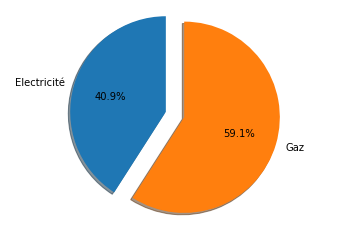

In [61]:

#TOTAL CONSO ELEC VS GAZ

with connection.cursor() as cursor:
    cursor.execute("""select energies.id, sum(deliveries.conso) as TOTAL_CONSO
                    FROM deliveries 
                    INNER JOIN energies ON energies.id = deliveries.energy_id 
					group by energies.id""")
    fetchall = cursor.fetchall()
    print(fetchall)
    print(fetchall[0][1])
    print(fetchall[1][1])
  


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Electricité', 'Gaz'
sizes = [fetchall[0][1], fetchall[1][1]]
explode = (0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


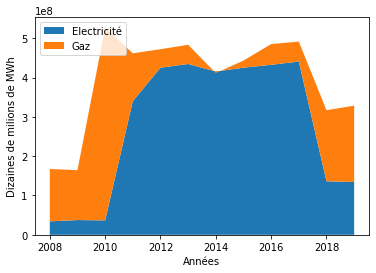

In [77]:
with connection.cursor() as cursor:
    cursor.execute("""select energies.id, deliveries.date, sum(deliveries.conso) as TOTAL_CONSO
                    FROM deliveries 
                    INNER JOIN energies ON energies.id = deliveries.energy_id 
					group by deliveries.date, energies.id
					order by energies.id, deliveries.date, energies.id""")
    fetchall = cursor.fetchall()

# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO
year = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
population_by_continent = {
    'Electricité': [fetchall[0][2],fetchall[1][2],fetchall[2][2],fetchall[3][2],fetchall[4][2],fetchall[5][2],fetchall[6][2],fetchall[7][2],fetchall[8][2],fetchall[9][2],fetchall[10][2],fetchall[11][2]],
    'Gaz': [fetchall[12][2]-fetchall[0][2],fetchall[13][2]-fetchall[1][2],fetchall[14][2]-fetchall[2][2],fetchall[15][2]-fetchall[3][2],fetchall[16][2]-fetchall[4][2],fetchall[17][2]-fetchall[5][2],fetchall[18][2]-fetchall[6][2],fetchall[19][2]-fetchall[7][2],fetchall[20][2]-fetchall[8][2],fetchall[21][2]-fetchall[9][2],fetchall[22][2]-fetchall[10][2],fetchall[23][2]-fetchall[11][2]],
}

fig, ax = plt.subplots()
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys())
ax.legend(loc='upper left')
#ax.set_title('World population')
ax.set_xlabel('Années')
ax.set_ylabel('Dizaines de milions de MWh')

plt.show()

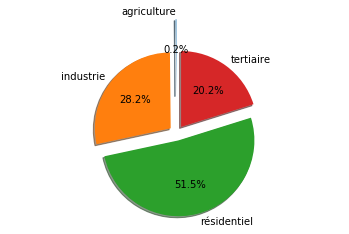

In [59]:
#TOTAL CONSO ELEC PAR SECTEUR 

with connection.cursor() as cursor:
    cursor.execute("""select sectors.sector, sum(deliveries.conso) as TOTAL_CONSO
                    FROM deliveries 
                    INNER JOIN energies ON energies.id = deliveries.energy_id 
                    INNER JOIN sectors ON sectors.id = deliveries.sector_id
                    WHERE energies.id = 1
					group by sectors.sector
					order by sectors.sector""")
    fetchall = cursor.fetchall()


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'agriculture', 'industrie', 'résidentiel', 'tertiaire'
sizes = [fetchall[1][1], fetchall[2][1], fetchall[3][1], fetchall[4][1]]
explode = (0.5, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

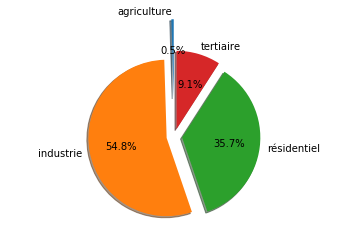

In [50]:
#TOTAL CONSO GAZ PAR SECTEUR 

with connection.cursor() as cursor:
    cursor.execute("""select sectors.sector, sum(deliveries.conso) as TOTAL_CONSO
                    FROM deliveries 
                    INNER JOIN energies ON energies.id = deliveries.energy_id 
                    INNER JOIN sectors ON sectors.id = deliveries.sector_id
                    WHERE energies.id = 2
					group by sectors.sector
					order by sectors.sector""")
    fetchall = cursor.fetchall()


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'agriculture', 'industrie', 'résidentiel', 'tertiaire'
sizes = [fetchall[1][1], fetchall[2][1], fetchall[3][1], fetchall[4][1]]
explode = (0.5, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

9778873


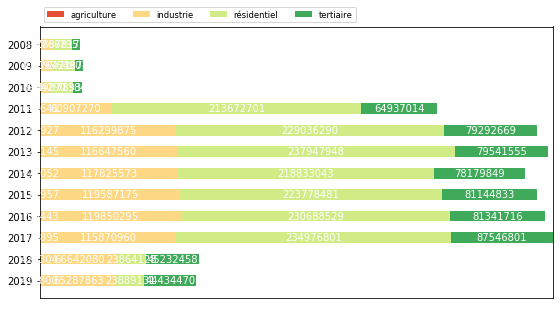

In [55]:
#TOTAL CONSO ELEC PAR SECTEUR ET ANNEE

with connection.cursor() as cursor:
    cursor.execute("""select sectors.sector, deliveries.date, sum(deliveries.conso) as TOTAL_CONSO
                    FROM deliveries 
                    INNER JOIN energies ON energies.id = deliveries.energy_id 
                    INNER JOIN sectors ON sectors.id = deliveries.sector_id
					WHERE energies.id = 1
					group by sectors.sector, deliveries.date
					order by deliveries.date, sectors.sector""")
    fetchall = cursor.fetchall()
    
    
    
category_names = ['agriculture', 'industrie',
                  'résidentiel', 'tertiaire']
results = {
    '2008': [0, fetchall[1][2], fetchall[2][2], fetchall[3][2]],
    '2009': [0, fetchall[5][2], fetchall[6][2], fetchall[7][2]],
    '2010': [0, fetchall[9][2], fetchall[10][2], fetchall[11][2]],
    '2011': [fetchall[13][2], fetchall[14][2], fetchall[15][2], fetchall[16][2]],
    '2012': [fetchall[18][2], fetchall[19][2], fetchall[20][2], fetchall[21][2]],
    '2013': [fetchall[23][2], fetchall[24][2], fetchall[25][2], fetchall[26][2]],
    '2014': [fetchall[28][2], fetchall[29][2], fetchall[30][2], fetchall[31][2]],
    '2015': [fetchall[33][2], fetchall[34][2], fetchall[35][2], fetchall[36][2]],
    '2016': [fetchall[38][2], fetchall[39][2], fetchall[40][2], fetchall[41][2]],
    '2017': [fetchall[43][2], fetchall[44][2], fetchall[45][2], fetchall[46][2]],
    '2018': [fetchall[48][2], fetchall[49][2], fetchall[50][2], fetchall[51][2]],
    '2019': [fetchall[53][2], fetchall[54][2], fetchall[55][2], fetchall[56][2]]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

166267505


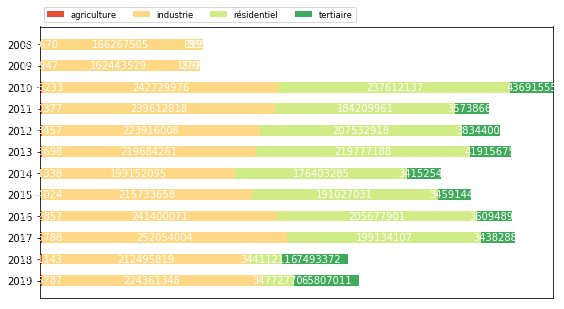

In [58]:
#TOTAL CONSO GAZ PAR SECTEUR ET ANNEE

with connection.cursor() as cursor:
    cursor.execute("""select sectors.sector, deliveries.date, sum(deliveries.conso) as TOTAL_CONSO
                    FROM deliveries 
                    INNER JOIN energies ON energies.id = deliveries.energy_id 
                    INNER JOIN sectors ON sectors.id = deliveries.sector_id
					WHERE energies.id = 2
					group by sectors.sector, deliveries.date
					order by deliveries.date, sectors.sector""")
    fetchall = cursor.fetchall()
    
    
    
category_names = ['agriculture', 'industrie',
                  'résidentiel', 'tertiaire']
results = {
    '2008': [fetchall[0][2], fetchall[1][2], fetchall[2][2], fetchall[3][2]],
    '2009': [fetchall[4][2], fetchall[5][2], fetchall[6][2], fetchall[7][2]],
    '2010': [fetchall[9][2], fetchall[10][2], fetchall[11][2], fetchall[12][2]],
    '2011': [fetchall[14][2], fetchall[15][2], fetchall[16][2], fetchall[17][2]],
    '2012': [fetchall[19][2], fetchall[20][2], fetchall[21][2], fetchall[22][2]],
    '2013': [fetchall[24][2], fetchall[25][2], fetchall[26][2], fetchall[27][2]],
    '2014': [fetchall[29][2], fetchall[30][2], fetchall[31][2], fetchall[32][2]],
    '2015': [fetchall[34][2], fetchall[35][2], fetchall[36][2], fetchall[37][2]],
    '2016': [fetchall[39][2], fetchall[40][2], fetchall[41][2], fetchall[42][2]],
    '2017': [fetchall[44][2], fetchall[45][2], fetchall[46][2], fetchall[47][2]],
    '2018': [fetchall[49][2], fetchall[50][2], fetchall[51][2], fetchall[52][2]],
    '2019': [fetchall[54][2], fetchall[55][2], fetchall[56][2], fetchall[57][2]]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

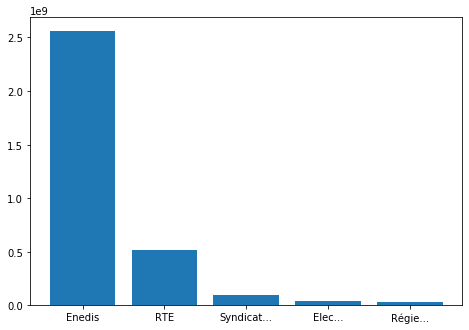

 Enedis : 2560344286 MWh
 RTE : 515512087 MWh
 Syndicat délectricité Synergie Maurienne : 93245064 MWh
 Electricité de Strasbourg : 36388650 MWh
 Régie électrique de Saint Laurent de Cerdans : 31556586 MWh



In [56]:
#TOP TOTAL CONSO ELEC PAR OPERATOR


with connection.cursor() as cursor:
    cursor.execute("""select operators.operator, sum(deliveries.conso) as TOTAL_CONSO
                    FROM deliveries 
                    INNER JOIN operators ON operators.id = deliveries.operator_id
					INNER JOIN energies ON energies.id = deliveries.energy_id
					WHERE energies.id = 1
					group by operators.operator
					order by TOTAL_CONSO DESC
					LIMIT 10""")
    fetchall = cursor.fetchall()

    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ["Enedis","RTE","Syndicat...","Elec...","Régie...",]
students = [fetchall[0][1], fetchall[1][1], fetchall[2][1], fetchall[3][1], fetchall[4][1]]
ax.bar(langs,students)
plt.show()
print("",fetchall[0][0],":",fetchall[0][1],"MWh\n",fetchall[1][0],":",fetchall[1][1],"MWh\n",fetchall[2][0],":",fetchall[2][1],"MWh\n",fetchall[3][0],":",fetchall[3][1],"MWh\n",fetchall[4][0],":",fetchall[4][1],"MWh\n")

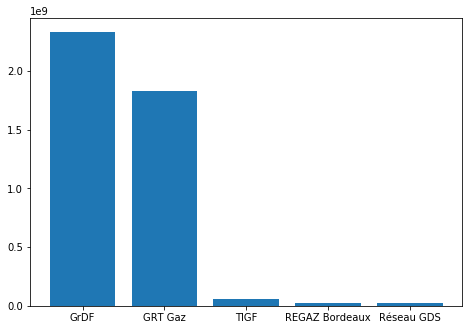

 GrDF : 2335102092 MWh
 GRT Gaz : 1831654624 MWh
 TIGF : 57881081 MWh
 REGAZ Bordeaux : 24155374 MWh
 Réseau GDS : 23314987 MWh



In [5]:
#TOP TOTAL CONSO GAZ PAR OPERATOR


with connection.cursor() as cursor:
    cursor.execute("""select operators.operator, sum(deliveries.conso) as TOTAL_CONSO
                    FROM deliveries 
                    INNER JOIN operators ON operators.id = deliveries.operator_id
					INNER JOIN energies ON energies.id = deliveries.energy_id
					WHERE energies.id = 2
					group by operators.operator
					order by TOTAL_CONSO DESC
					LIMIT 10""")
    fetchall = cursor.fetchall()

    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [fetchall[0][0],fetchall[1][0],fetchall[4][0],fetchall[5][0],fetchall[6][0]]
students = [fetchall[0][1], fetchall[1][1], fetchall[4][1], fetchall[5][1], fetchall[6][1]]
ax.bar(langs,students)
plt.show()
print("",fetchall[0][0],":",fetchall[0][1],"MWh\n",fetchall[1][0],":",fetchall[1][1],"MWh\n",fetchall[4][0],":",fetchall[4][1],"MWh\n",fetchall[5][0],":",fetchall[5][1],"MWh\n",fetchall[6][0],":",fetchall[6][1],"MWh\n")